<a href="https://colab.research.google.com/github/Venkyme2003/NIT_Puducherry_Internship/blob/main/Phishing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifierP
import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NITPY/phishing.csv")
data.head()


,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

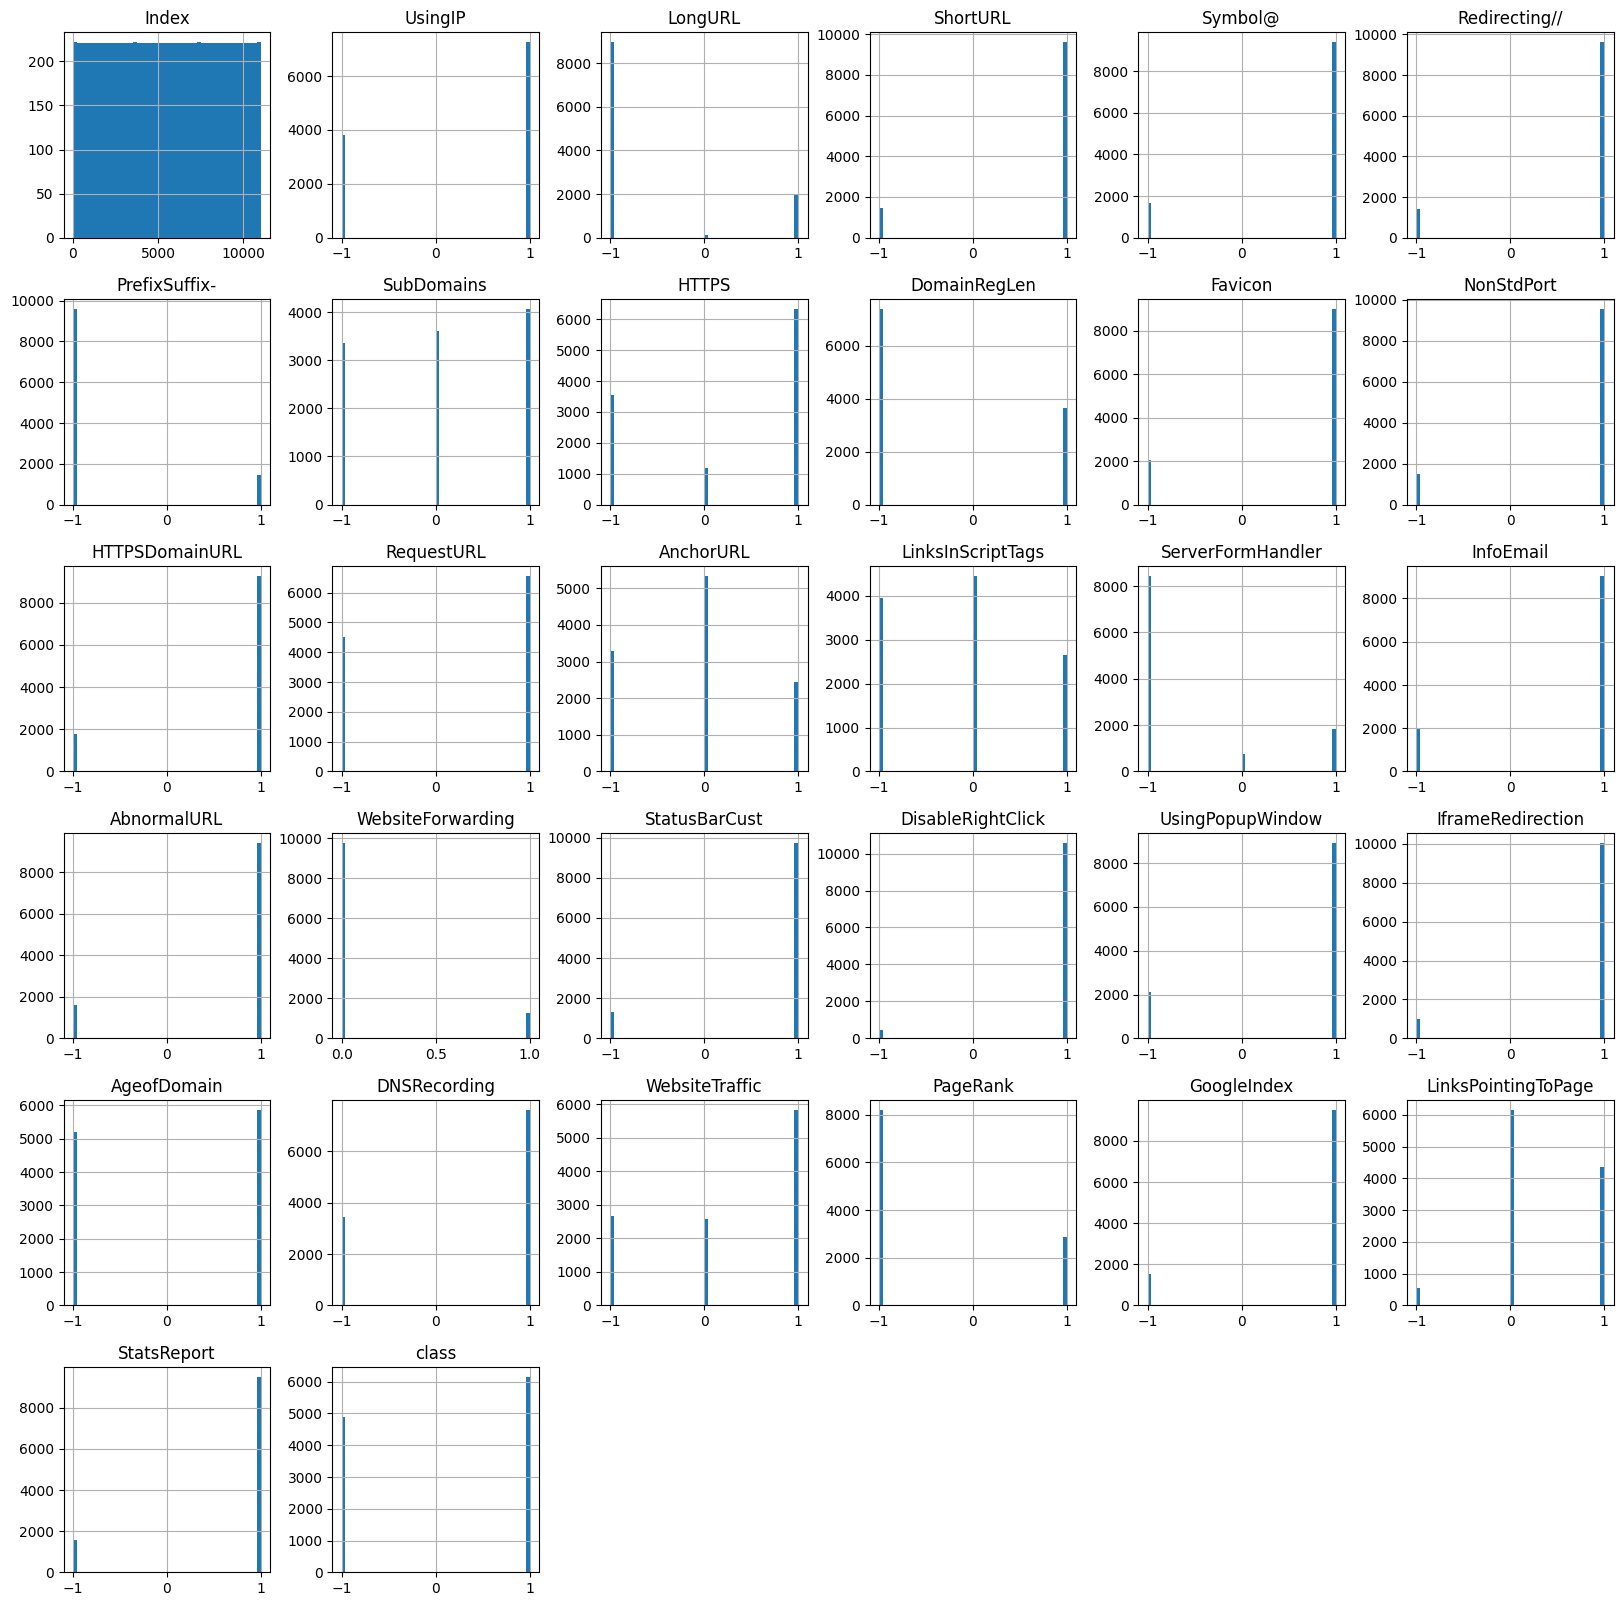

In [ ]:
data.hist(bins=50,figsize=(20,20))
plt.show()

In [ ]:
data.isnull().sum()

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [ ]:
X = data.drop(columns="class")
X

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,1,-1,-1,0,-1,1,1,1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,1,-1,1,-1,1,0,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
3,3,1,0,-1,1,1,-1,1,1,-1,...,1,-1,1,-1,-1,0,-1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,1,-1,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,11049,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,-1,1,1,-1,-1,1,1,1
11050,11050,-1,1,1,-1,-1,-1,1,-1,-1,...,1,-1,1,1,1,1,1,1,-1,1
11051,11051,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,1,-1,1,0,1
11052,11052,-1,-1,1,1,1,-1,-1,-1,1,...,1,-1,1,1,1,1,-1,1,1,1


In [ ]:
Y=data["class"]
Y=pd.DataFrame(Y)
Y.head()

,class
0,-1
1,-1
2,-1
3,1
4,1


In [ ]:
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size=0.3,random_state=2)

In [ ]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(7737, 31)
(7737, 1)
(3317, 31)
(3317, 1)


<Axes: >

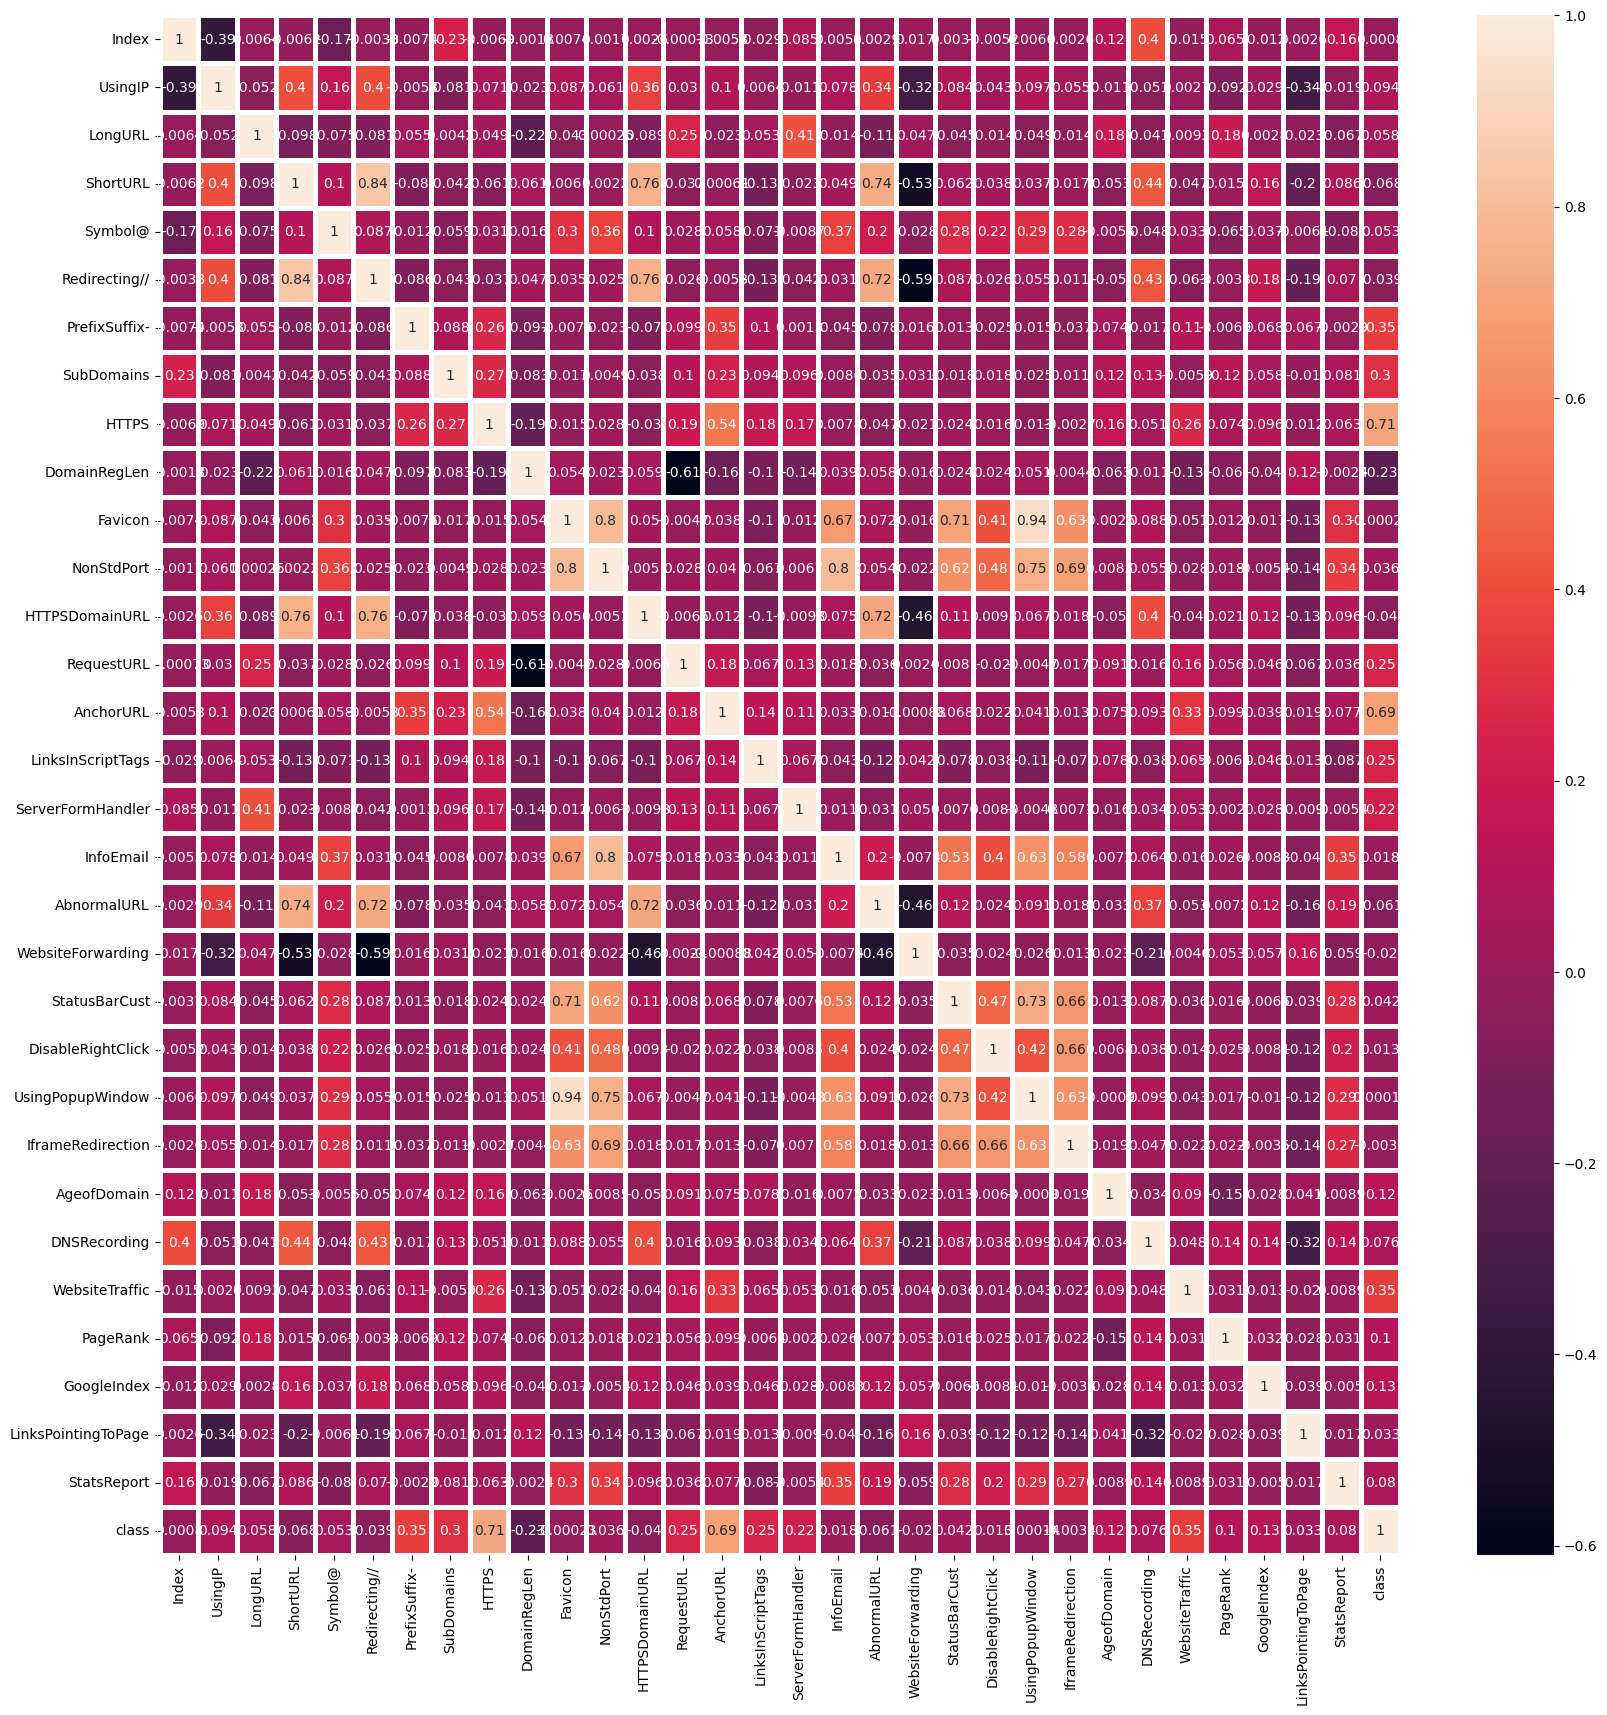

In [ ]:
corr = data.corr()
fig,ax= plt.subplots(figsize=(20,20))
sns.heatmap(corr,annot=True,linewidth=2.5,ax=ax)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)
# Initialize GridSearchCV with the Random Forest model and the parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [ ]:
# Fit GridSearchCV on the training data
grid_search.fit(train_X, train_Y)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [ ]:
# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")
# Train the best model on the full training data
best_rf = grid_search.best_estimator_
best_rf.fit(train_X, train_Y)

Best parameters found: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


<ipython-input-21-e978029da293>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf.fit(train_X, train_Y)


RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_split=5,
                       random_state=42)

In [ ]:
y_pred = best_rf.predict(test_X)

In [ ]:
# Evaluate the model
print("Classification Report:")
print(classification_report(test_Y, y_pred))
print(f"Accuracy: {accuracy_score(test_Y, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

          -1       0.98      0.96      0.97      1458
           1       0.97      0.98      0.98      1859

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317

Accuracy: 0.9731685257763039


In [ ]:
print('Random Forest Classifier Accuracy:',round(accuracy_score(test_Y, y_pred)*100,2))

Random Forest Classifier Accuracy: 97.32


In [ ]:
cm = confusion_matrix(test_Y, y_pred)

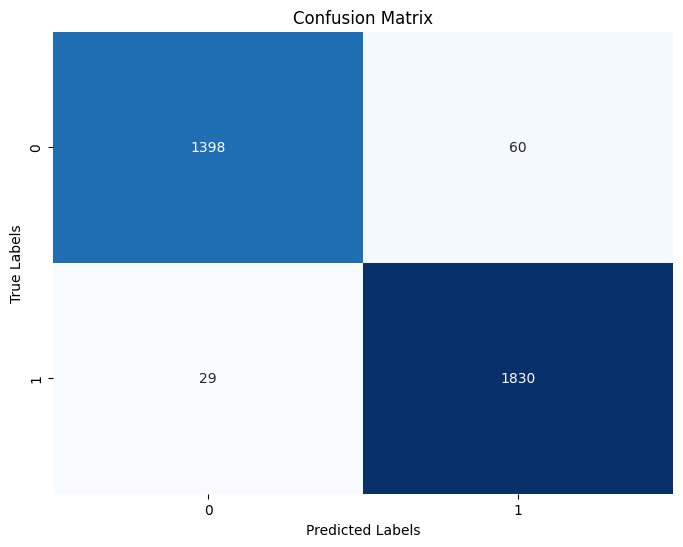

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

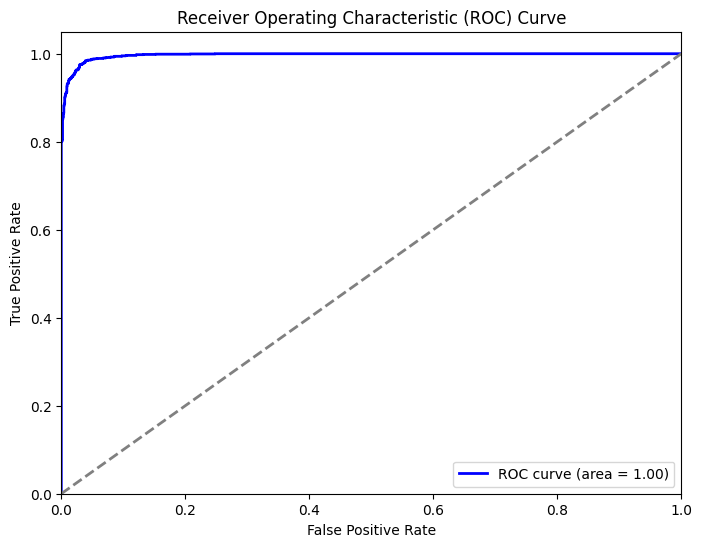

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# Calculate the predicted probabilities
y_prob = best_rf.predict_proba(test_X)[:, 1]
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(test_Y, y_prob)
roc_auc = roc_auc_score(test_Y, y_prob)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import xgboost as xgb

In [ ]:
data['class'] = data['class'].map({-1: 0, 1: 1})

In [ ]:
X = data.drop(columns='class')
y = data['class']

In [ ]:
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.3, random_state=2)

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [6, 10, 15, 20],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [ ]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [ ]:
grid_search.fit(train_X, train_Y)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [6, 10, 15, 20],
                         'n_estimators': [100, 200, 300, 400, 500],
                         'subsample': [0.8, 0.9, 1.0]},
             verbose=2)

In [ ]:
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")
# Train the best model on the full training data
best_rf = grid_search.best_estimator_
best_rf.fit(train_X, train_Y)

Best parameters found: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.9}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
best_lgbm = grid_search.best_estimator_
best_lgbm.fit(train_X, train_Y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = best_lgbm.predict(test_X)

In [ ]:
print("Classification Report:")
print(classification_report(test_Y, y_pred))
print(f"Accuracy: {accuracy_score(test_Y, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1458
           1       0.96      0.98      0.97      1859

    accuracy                           0.97      3317
   macro avg       0.97      0.96      0.97      3317
weighted avg       0.97      0.97      0.97      3317

Accuracy: 0.9656315948145915


In [ ]:
cm = confusion_matrix(test_Y, y_pred)

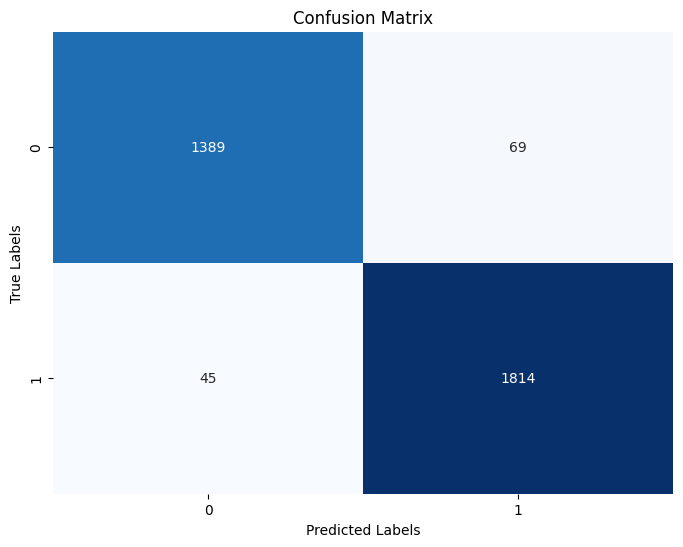

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
y_probs = best_lgbm.predict_proba(test_X)[:, 1]

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
fpr, tpr, thresholds = roc_curve(test_Y, y_probs)
roc_auc = auc(fpr, tpr)

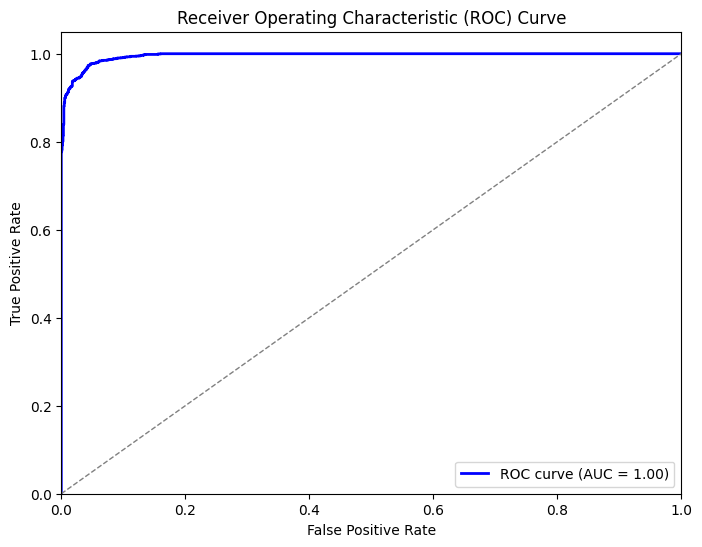

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier

# Initialize individual classifiers
clf1 = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20, min_samples_split=10, min_samples_leaf=2, bootstrap=True)
clf2 = xgb.XGBClassifier(random_state=42, n_estimators=200, max_depth=10, learning_rate=0.1, subsample=0.9, colsample_bytree=0.9)

# Create the voting classifier
voting_clf = VotingClassifier(estimators=[('rf', clf1), ('xgb', clf2)], voting='soft')

# Train the voting classifier
voting_clf.fit(train_X, train_Y)

# Predict on the test set
y_pred = voting_clf.predict(test_X)

# Evaluate the model
print("Classification Report:")
print(classification_report(test_Y, y_pred))
print(f"Accuracy: {accuracy_score(test_Y, y_pred)}")
print('Voting Classifier Accuracy:', round(accuracy_score(test_Y, y_pred) * 100, 2))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1458
           1       0.96      0.98      0.97      1859

    accuracy                           0.97      3317
   macro avg       0.97      0.96      0.97      3317
weighted avg       0.97      0.97      0.97      3317

Accuracy: 0.9662345492915285
Voting Classifier Accuracy: 96.62


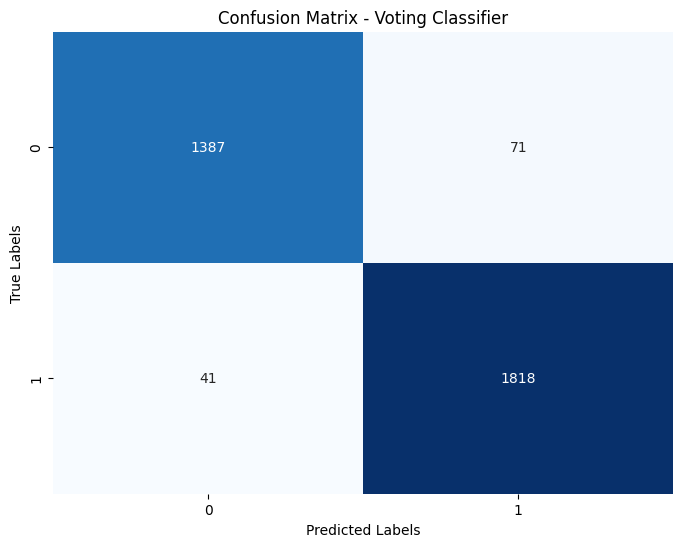

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Generate confusion matrix
cm = confusion_matrix(test_Y, y_pred)
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Voting Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

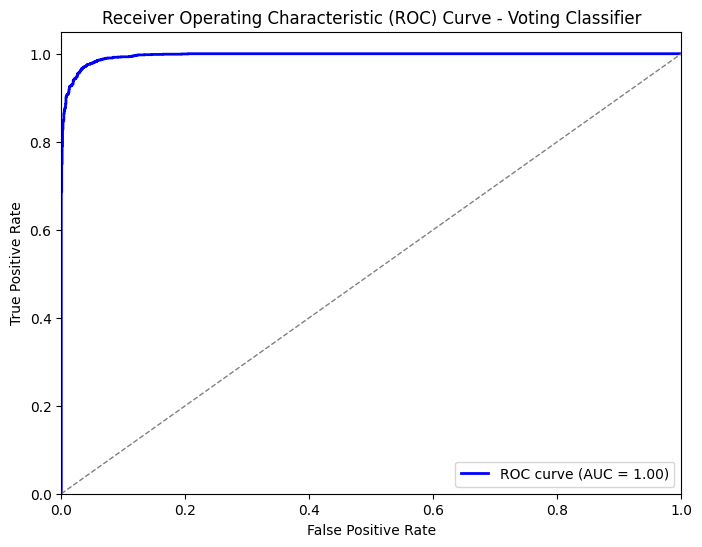

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Predict probabilities on the test data
y_probs = voting_clf.predict_proba(test_X)[:, 1]
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_Y, y_probs)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Voting Classifier')
plt.legend(loc="lower right")
plt.show()

0.9475429605064818
              precision    recall  f1-score   support

          -1       0.93      0.95      0.94      1416
           1       0.96      0.94      0.95      1901

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



<Axes: >

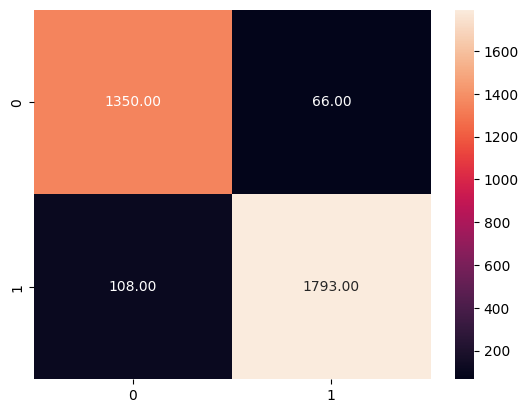

In [ ]:
tree = DecisionTreeClassifier()
model5=tree.fit(train_X,train_Y)
tree_predict = tree.predict(test_X)
acc_tree = accuracy_score(test_Y, tree_predict)
print(acc_tree)
print(classification_report(tree_predict,test_Y))
con  = confusion_matrix(tree_predict,test_Y)
sns.heatmap(con,annot=True,fmt='.2f')

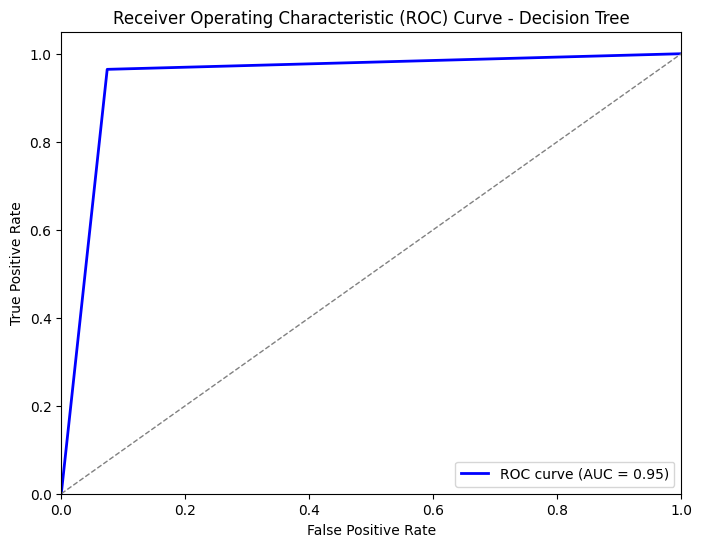

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
# Predict probabilities on the test data
tree_probs = tree.predict_proba(test_X)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_Y, tree_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7295749170937594
              precision    recall  f1-score   support

          -1       0.66      0.71      0.68      1355
           1       0.79      0.75      0.77      1962

    accuracy                           0.73      3317
   macro avg       0.72      0.73      0.72      3317
weighted avg       0.73      0.73      0.73      3317



<Axes: >

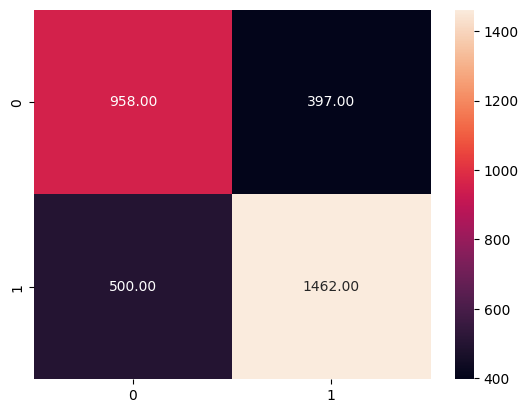

In [ ]:
svc=SVC(C=100,kernel='rbf',degree=2,gamma='auto',probability=True)
model2=svc.fit(train_X,train_Y)
svc_predict = svc.predict(test_X)
acc_svc = accuracy_score(test_Y, svc_predict)
print(acc_svc)
print(classification_report(svc_predict,test_Y))
con  = confusion_matrix(svc_predict,test_Y)
sns.heatmap(con,annot=True,fmt='.2f')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9475429605064818
              precision    recall  f1-score   support

          -1       0.92      0.96      0.94      1410
           1       0.97      0.94      0.95      1907

    accuracy                           0.95      3317
   macro avg       0.94      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



<Axes: >

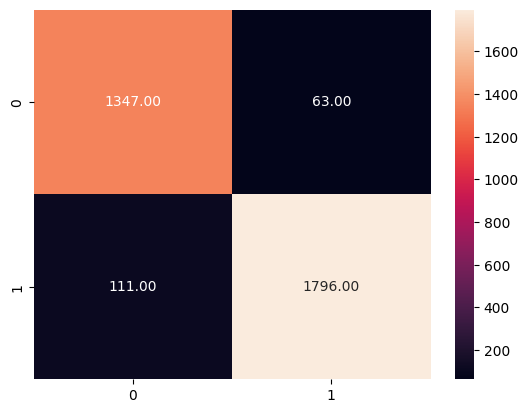

In [ ]:
gbc = GradientBoostingClassifier()
model3=gbc.fit(train_X,train_Y)
gbc_predict = gbc.predict(test_X)
acc_gbc = accuracy_score(test_Y, gbc_predict)
print(acc_gbc)
print(classification_report(gbc_predict,test_Y))
con  = confusion_matrix(gbc_predict,test_Y)
sns.heatmap(con,annot=True,fmt='.2f')

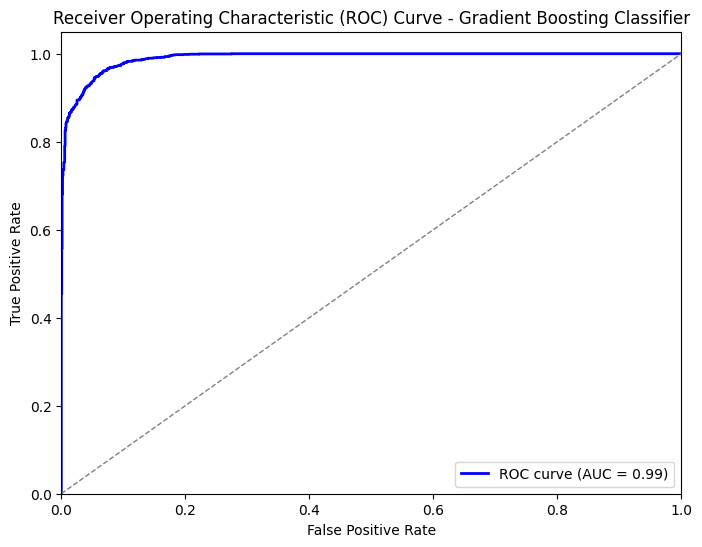

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
# Predict probabilities on the test data
gbc_probs = gbc.predict_proba(test_X)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_Y, gbc_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting Classifier')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.6050648176062707
              precision    recall  f1-score   support

          -1       0.52      0.55      0.54      1378
           1       0.67      0.64      0.66      1939

    accuracy                           0.61      3317
   macro avg       0.60      0.60      0.60      3317
weighted avg       0.61      0.61      0.61      3317



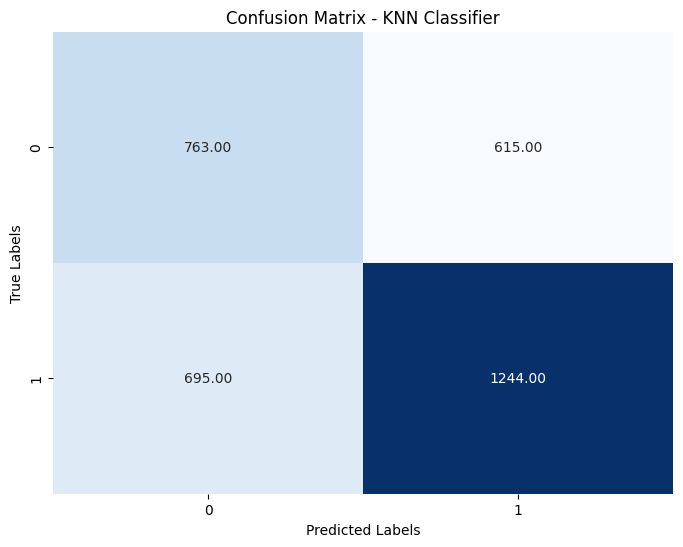

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
model_knn = knn.fit(train_X, train_Y)
knn_predict = knn.predict(test_X)
acc_knn = accuracy_score(test_Y, knn_predict)
print(acc_knn)
print(classification_report(knn_predict, test_Y))
con = confusion_matrix(knn_predict, test_Y)
plt.figure(figsize=(8, 6))
sns.heatmap(con, annot=True, fmt='.2f', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - KNN Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

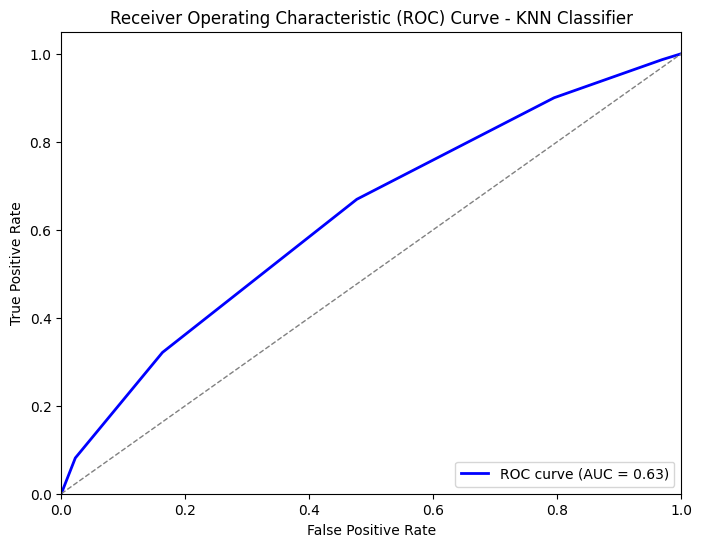

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
knn_probs = knn.predict_proba(test_X)[:, 1]
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_Y, knn_probs)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN Classifier')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.930057280675309
Classification Report:
              precision    recall  f1-score   support

          -1       0.90      0.94      0.92      1392
           1       0.96      0.92      0.94      1925

    accuracy                           0.93      3317
   macro avg       0.93      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



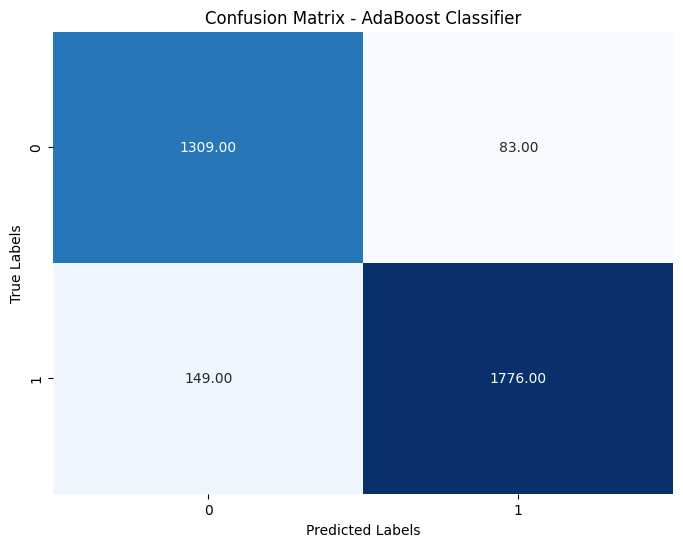

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50, random_state=42)  # Adjust n_estimators as needed
# Train the classifier on the training data
model_ada = ada.fit(train_X, train_Y)
# Predict on the test data
ada_predict = ada.predict(test_X)
# Evaluate the model
acc_ada = accuracy_score(test_Y, ada_predict)
print(f"Accuracy: {acc_ada}")
print("Classification Report:")
print(classification_report(ada_predict, test_Y))
# Generate confusion matrix
con = confusion_matrix(ada_predict, test_Y)
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(con, annot=True, fmt='.2f', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - AdaBoost Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

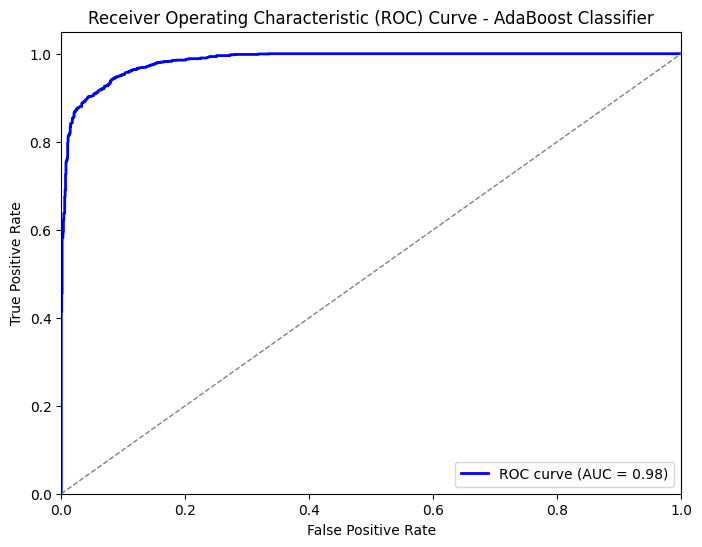

In [ ]:
ada_probs = ada.predict_proba(test_X)[:, 1]
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_Y, ada_probs)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - AdaBoost Classifier')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9276454627675611
Classification Report:
              precision    recall  f1-score   support

          -1       0.90      0.94      0.92      1400
           1       0.95      0.92      0.94      1917

    accuracy                           0.93      3317
   macro avg       0.92      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



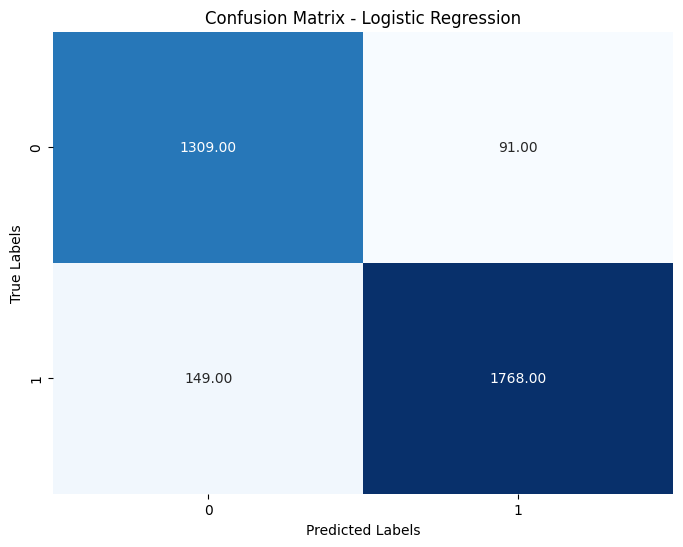

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)  # You can adjust other parameters as needed
# Train the classifier on the training data
model_log_reg = log_reg.fit(train_X, train_Y)
# Predict on the test data
log_reg_predict = log_reg.predict(test_X)
# Evaluate the model
acc_log_reg = accuracy_score(test_Y, log_reg_predict)
print(f"Accuracy: {acc_log_reg}")
print("Classification Report:")
print(classification_report(log_reg_predict, test_Y))
# Generate confusion matrix
con = confusion_matrix(log_reg_predict, test_Y)
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(con, annot=True, fmt='.2f', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

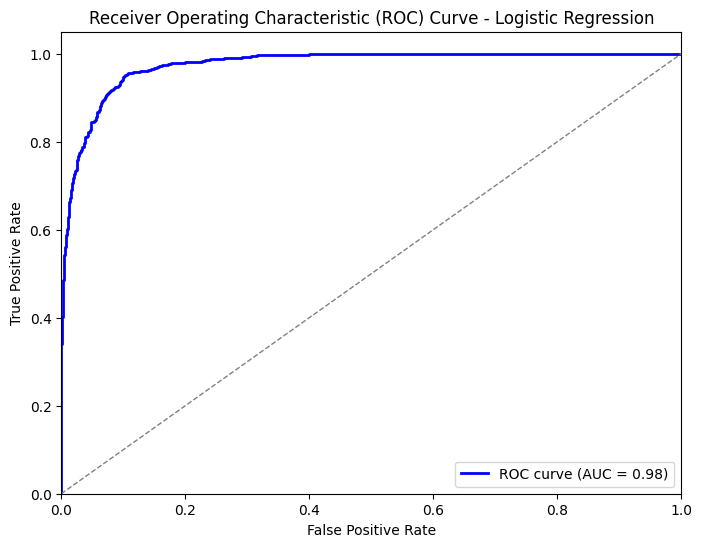

In [ ]:
log_reg_probs = log_reg.predict_proba(test_X)[:, 1]
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_Y, log_reg_probs)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()